In [1]:
import os
import get_geedata
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

## Consulta de datos
### Inputs del código
 
 * Archivo csv con las coordendas, dichos datos deben estar en WGS84 (longitud | latitud).
 * Periodo en el cual se realizará la descarga.
 

### Extraer datos NOAA y resumirlos a nivel diario

In [25]:
## conusltar las imageens disponibles en google earth engine para la misión en específico
datainit = get_geedata.gee_weatherdata("2018-01-01","2019-08-31", "data/truestationlocation.csv", mission = "noaa")
datainit.features

,longitude,latitude,index
0,-78.62869,-5.65875,1
1,-78.69203,-5.64777,2


In [26]:
## Señalar que bandas serán resumidas por promedio, sumatario, mínimio o máximo

avgbands =  ['Specific_humidity_height_above_ground', 
             'Pressure_surface']

sumbands = ['Downward_Long-Wave_Radp_Flux_surface_6_Hour_Average', 
            'Downward_Short-Wave_Radiation_Flux_surface_6_Hour_Average',
            'Upward_Long-Wave_Radp_Flux_surface_6_Hour_Average', 
            'Upward_Short-Wave_Radiation_Flux_surface_6_Hour_Average',
            'Precipitation_rate_surface_6_Hour_Average',
            'Potential_Evaporation_Rate_surface_6_Hour_Average']

minbands = ['Minimum_temperature_height_above_ground_6_Hour_Interval']
maxbands = ['Maximum_temperature_height_above_ground_6_Hour_Interval']


In [27]:
## extracción de los datos

noaadata= datainit.summarise_noaa(averagecols=avgbands,
                       cummulativecols=sumbands,
                       minimumcols = minbands,
                       maximumcols = maxbands)

D:\OneDrive - CGIAR\projects\gee_NOAA\get_geedata.py:331: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  bands = [x for x in bands if x not in notinall]


average features processed
cummulative features processed
minimum features processed
maximum features processed


In [28]:
noaadata.head()

,Downward_Long-Wave_Radp_Flux_surface_6_Hour_Average,Downward_Short-Wave_Radiation_Flux_surface_6_Hour_Average,Upward_Long-Wave_Radp_Flux_surface_6_Hour_Average,Upward_Short-Wave_Radiation_Flux_surface_6_Hour_Average,Precipitation_rate_surface_6_Hour_Average,Potential_Evaporation_Rate_surface_6_Hour_Average,Specific_humidity_height_above_ground,Pressure_surface,Maximum_temperature_height_above_ground_6_Hour_Interval,Minimum_temperature_height_above_ground_6_Hour_Interval,date,longitude,latitude
0,1517.0,1126.0,1748.0,185.0,0.000105,2368.0,0.011743,90897.5,303.100006,290.600006,2018-01-01,-78.62869,-5.65875
1,1517.0,1126.0,1748.0,185.0,0.000105,2368.0,0.011743,90897.5,303.100006,290.600006,2018-01-01,-78.69203,-5.64777
2,1488.0,1256.0,1746.0,213.0,0.000048,2355.0,0.012793,90837.5,303.899994,287.700012,2018-01-02,-78.62869,-5.65875
3,1488.0,1256.0,1746.0,213.0,0.000048,2355.0,0.012793,90837.5,303.899994,287.700012,2018-01-02,-78.69203,-5.64777
4,1445.0,1300.0,1731.0,222.0,0.000000,1981.0,0.011776,90822.5,302.899994,286.899994,2018-01-03,-78.62869,-5.65875


   longitude  latitude  index
0  -78.62869  -5.65875      1
1  -78.69203  -5.64777      2


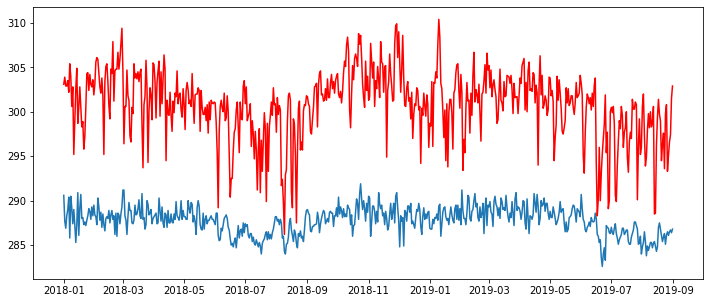

In [30]:
### gráficar resultados
print(datainit.features)

ref_long = datainit.features.longitude.loc[0]

plotdata = noaadata[np.round(noaadata.longitude, 5) == np.round(ref_long, 5)]
#plotdata = datasummarised[np.in1d(datasummarised.index.get_level_values(2), [-5.65875])]

plt.figure(figsize=[12,5])
plt.plot(plotdata.date, plotdata['Minimum_temperature_height_above_ground_6_Hour_Interval'].values)
plt.plot(plotdata.date, plotdata['Maximum_temperature_height_above_ground_6_Hour_Interval'].values, color = 'red')
plt.show()


In [20]:
### exportar datos
noaadata.to_csv(os.path.join("results","noaa_data_odkperu.csv"))

## Extraer datos CHIRPS

In [31]:
## conusltar las imageens disponibles en google earth engine para la misión en específico
datachirps = get_geedata.gee_weatherdata("2018-01-01","2019-12-31", "data/truestationlocation.csv","chirps")
datachirps.features

,longitude,latitude,index
0,-78.62869,-5.65875,1
1,-78.69203,-5.64777,2


In [32]:
## resumir los datos en una tabla
dfchirps = datachirps.CHIRPSdata_asdf()
dfchirps.head()

,precipitation,date,longitude,latitude
0,22.337193,2018-01-01,-78.62869,-5.65875
1,18.169334,2018-01-01,-78.69203,-5.64777
2,0.000000,2018-01-02,-78.62869,-5.65875
3,0.000000,2018-01-02,-78.69203,-5.64777
4,0.000000,2018-01-03,-78.62869,-5.65875


   longitude  latitude  index
0  -78.62869  -5.65875      1
1  -78.69203  -5.64777      2


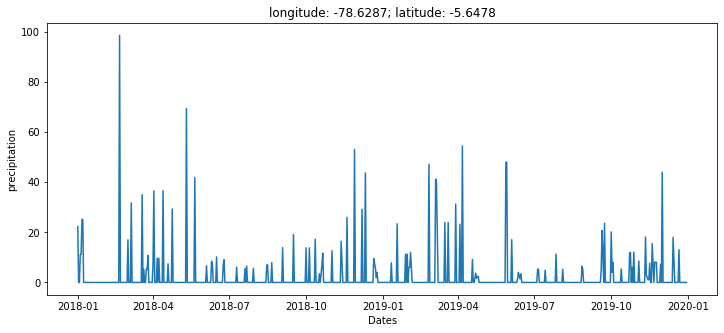

In [33]:
### gráficar resultados
print(datachirps.features)
datachirps.plot_CHIRPS(feature_index= 1)

In [5]:
### exportar datos
dfchirps.to_csv(os.path.join("D:/OneDrive - CGIAR/projects/stc_peru/results","sixstationsCHIRPS.csv"))

## Extraer datos GLDAS y resumirlos a nivel diario

In [35]:
## conusltar las imageens disponibles en google earth engine para la misión en específico
datainit = get_geedata.gee_weatherdata("2018-01-01","2019-12-31", "data/truestationlocation.csv", mission = "gldas")
datainit.features

,longitude,latitude,index
0,-78.62869,-5.65875,1
1,-78.69203,-5.64777,2


In [36]:
## Señalar que bandas serán resumidas por promedio, sumatario, mínimio o máximo

avgbands =  ['AvgSurfT_inst', 
             'Tair_f_inst',
            'SoilMoi0_10cm_inst',
            'Psurf_f_inst',
            'Qair_f_inst']

sumbands = ['Evap_tavg', 
            'PotEvap_tavg',
            'Lwnet_tavg',
            'LWdown_f_tavg',
            'Rainf_f_tavg']

minbands = ['Tair_f_inst']
maxbands = ['Tair_f_inst']

In [37]:
## extracción de los datos

gldasdata= datainit.summarise_noaa(averagecols=avgbands,
                       cummulativecols=sumbands,
                       minimumcols = minbands,
                       maximumcols = maxbands)

D:\OneDrive - CGIAR\projects\gee_NOAA\get_geedata.py:331: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  bands = [x for x in bands if x not in notinall]


average features processed
cummulative features processed
minimum features processed
maximum features processed


In [38]:
gldasdata.head()

,Evap_tavg,PotEvap_tavg,Lwnet_tavg,LWdown_f_tavg,Rainf_f_tavg,AvgSurfT_inst,Tair_f_inst,SoilMoi0_10cm_inst,Psurf_f_inst,Qair_f_inst,Tair_f_inst,Tair_f_inst,date,longitude,latitude
0,0.000004,1922.116175,-393.557877,3272.136719,0.0,300.454529,297.459351,11.451500,92314.343750,0.010652,302.882568,293.325439,2018-01-01,-78.62869,-5.65875
1,0.000004,1922.116175,-393.557877,3272.136719,0.0,300.454529,297.459351,11.451500,92314.343750,0.010652,302.882568,293.325439,2018-01-01,-78.69203,-5.64777
2,0.000004,2208.133296,-522.305193,3167.621796,0.0,300.913116,297.807892,11.422500,92300.109375,0.011071,305.126221,293.130524,2018-01-02,-78.62869,-5.65875
3,0.000004,2208.133296,-522.305193,3167.621796,0.0,300.913116,297.807892,11.422500,92300.109375,0.011071,305.126221,293.130524,2018-01-02,-78.69203,-5.64777
4,0.000005,2518.910603,-700.652435,3009.170746,0.0,301.330078,297.787079,11.387875,92203.703125,0.010850,305.608917,291.846893,2018-01-03,-78.62869,-5.65875


   longitude  latitude  index
0  -78.62869  -5.65875      1
1  -78.69203  -5.64777      2


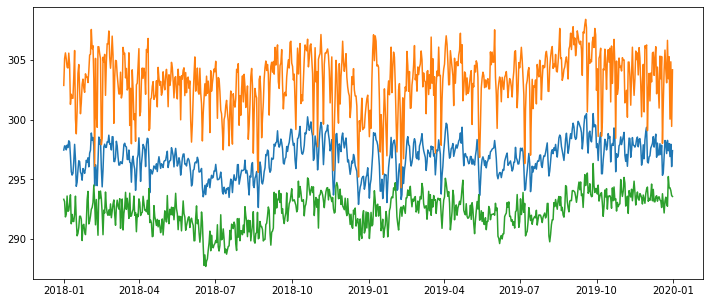

In [40]:
### gráficar resultados
print(datainit.features)

ref_long = datainit.features.longitude.loc[0]

plotdata = gldasdata[np.round(gldasdata.longitude, 5) == np.round(ref_long, 5)]


plt.figure(figsize=[12,5])
plt.plot(plotdata.date, plotdata['Tair_f_inst'].values)
plt.show()

In [24]:
### exportar datos
gldasdata.to_csv(os.path.join("results","gldas_data_twostations.csv"))